In [2]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [2]:
with open('spectrum.txt') as f:
    lines = f.readlines()[1:]
    
    freqs = [float(item.split('\t')[0]) for item in lines]
    db_levels = [float(item.strip().split('\t')[1]) for item in lines]

In [14]:
explosao_sala_centro = '../audio/lab1/explosao_sala_centro.wav'
explosao_sala_fundo  = '../audio/lab1/explosao_sala_fundo.wav'

explosao_rampa_centro = '../audio/lab1/explosao_rampa_centro.wav'
explosao_rampa_fundo  = '../audio/lab1/explosao_rampa_fundo.wav'

In [15]:
wav_esc, sr_esc = sf.read(explosao_sala_centro)
wav_esf, sr_esf = sf.read(explosao_sala_fundo)

wav_erc, sr_erc = sf.read(explosao_rampa_centro)
wav_erf, sr_erf = sf.read(explosao_rampa_fundo)

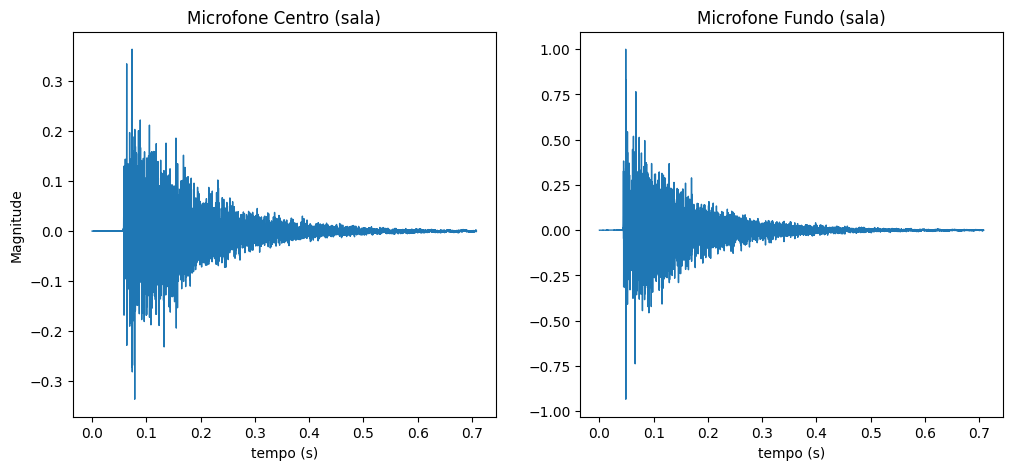

In [12]:
x = np.arange(len(wav_esc)) / sr_esc

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(x, wav_esc, linewidth=1);
plt.title('Microfone Centro (sala)')
plt.xlabel('tempo (s)')
plt.ylabel('Magnitude')

plt.subplot(122)
plt.plot(x, wav_esf, linewidth=1);
plt.title('Microfone Fundo (sala)')
plt.xlabel('tempo (s)')
plt.show()

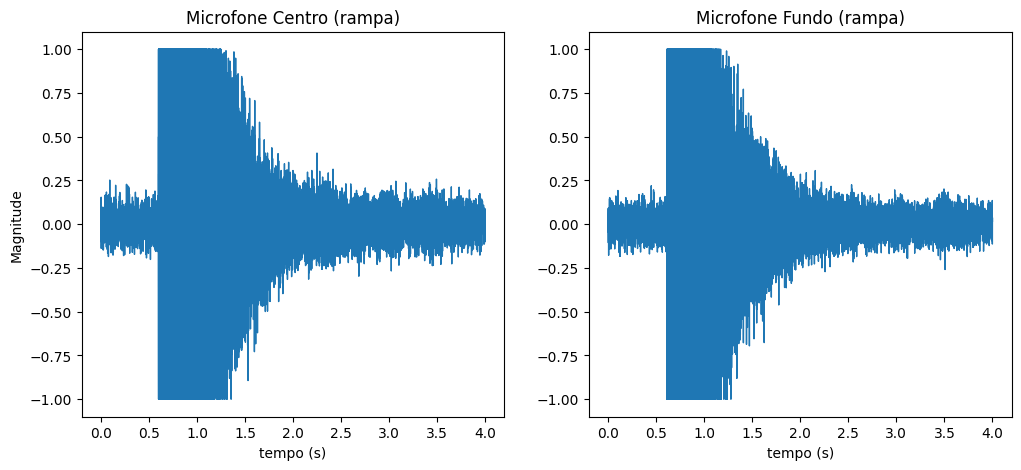

In [18]:
wav_erc = wav_erc[:4*sr_erc]
wav_erf = wav_erf[:4*sr_erf]

x = np.arange(len(wav_erc)) / sr_erc

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(x, wav_erc, linewidth=1);
plt.title('Microfone Centro (rampa)')
plt.xlabel('tempo (s)')
plt.ylabel('Magnitude')

plt.subplot(122)
plt.plot(x, wav_erf, linewidth=1);
plt.title('Microfone Fundo (rampa)')
plt.xlabel('tempo (s)')
plt.show()

In [5]:
np.fft.ifft([0, 4, 0, 0])

array([ 1.+0.j,  0.+1.j, -1.+0.j,  0.-1.j])

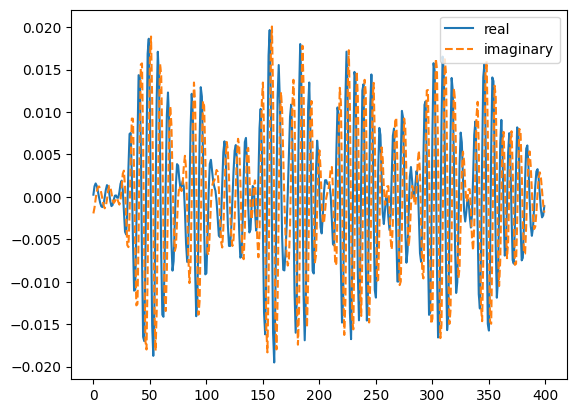

In [6]:
import matplotlib.pyplot as plt
t = np.arange(400)
n = np.zeros((400,), dtype=complex)
n[40:60] = np.exp(1j*np.random.uniform(0, 2*np.pi, (20,)))
s = np.fft.ifft(n)
plt.plot(t, s.real, label='real')
plt.plot(t, s.imag, '--', label='imaginary')
plt.legend()
plt.show()

In [4]:
np.fft.ifft(db_levels)

[-55.882954,
 -57.277168,
 -55.685234,
 -52.733505,
 -50.639713,
 -53.150841,
 -52.483711,
 -50.851692,
 -50.922497,
 -49.387688,
 -50.249252,
 -52.107571,
 -50.284672,
 -50.091633,
 -49.583366,
 -50.752647,
 -53.182152,
 -51.34137,
 -50.997231,
 -54.354149,
 -52.053749,
 -53.443558,
 -50.70467,
 -50.062416,
 -50.392994,
 -50.252808,
 -49.658264,
 -48.039303,
 -49.658489,
 -47.52198,
 -47.033909,
 -48.54882,
 -48.437183,
 -49.819172,
 -47.185089,
 -46.851288,
 -46.39592,
 -47.643326,
 -47.884079,
 -48.665775,
 -47.498142,
 -48.594185,
 -50.06477,
 -49.035007,
 -48.165443,
 -48.27095,
 -49.040581,
 -49.00164,
 -50.388657,
 -50.010159,
 -50.06675,
 -48.842556,
 -48.210186,
 -49.392632,
 -51.259392,
 -50.124008,
 -48.412338,
 -48.927544,
 -49.837639,
 -48.954151,
 -50.336166,
 -51.343658,
 -50.53796,
 -52.693356,
 -53.314743,
 -53.229843,
 -50.92532,
 -50.165882,
 -51.983536,
 -51.620293,
 -50.921249,
 -50.922443,
 -50.934052,
 -51.090603,
 -51.739361,
 -51.53215,
 -48.769478,
 -48.536457